In [55]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Years of Experience & Salary (Exploratory)

In [56]:
df = pd.read_csv('C:\\Users\\Sophia\\Downloads\\archive\\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


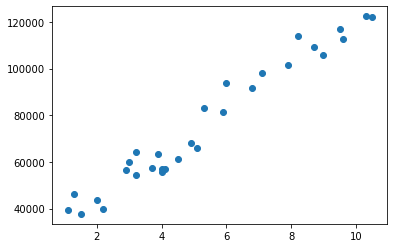

In [57]:
plt.scatter(df['YearsExperience'], df['Salary'] )
#distinct clusters are not visible at first glance

In [58]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['YearsExperience', 'Salary']])
    sse.append(km.inertia_ )

Text(0.5, 1.0, 'Elbow Method to Find K')

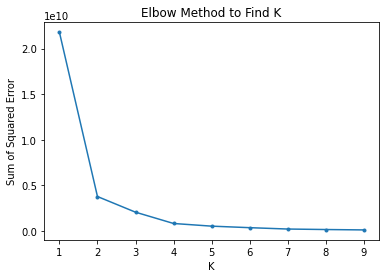

In [59]:
plt.plot(k_rng,sse, marker = '.')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method to Find K')

In [60]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df[['YearsExperience', 'Salary']])
y_predicted

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3])

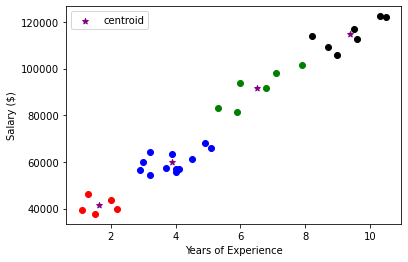

In [61]:
df['Cluster'] = y_predicted #appending cluster assigning column
df1 =df[df.Cluster == 0]
df2 =df[df.Cluster == 1]
df3 =df[df.Cluster == 2]
df4 =df[df.Cluster == 3]
#plotting all on same graph
plt.scatter(df1.YearsExperience, df1['Salary'], color = 'red')
plt.scatter(df2.YearsExperience, df2['Salary'], color = 'green')
plt.scatter(df3.YearsExperience, df3['Salary'], color = 'blue')
plt.scatter(df4.YearsExperience, df4['Salary'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()


# Country Risk Rating (Multi-Feature & Scaling)

Exploratory Analysis

In [110]:
raw_data = pd.read_csv('C:\\Users\\Sophia\\Desktop\\Summer22Research\\Country Risk 2019 Data.csv')
raw_data

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021


In [111]:
#summary statistics
print("\nSummary statistics\n", raw_data.describe())
print("\nCorrelation matrix\n", raw_data.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


Since corruption and legal features are highly correlated, we can drop corruption and use the remaining 3 features for the analysis.

In [112]:
#normalizing all features to make them equally weighted
data = raw_data[['Peace', 'Legal', 'GDP Growth']]
data = (data - data.mean())/data.std()
data

,Peace,Legal,GDP Growth
0,-0.390081,-0.878158,0.126952
1,0.472352,-0.958948,-0.040772
2,-0.026039,-0.484397,-2.230541
3,0.634871,-0.684553,1.303747
4,-1.261182,1.900001,-0.368418
...,...,...,...
116,-0.628442,0.419578,-0.880560
117,-0.268734,-0.486581,1.498775
118,2.964307,-2.242855,-0.212396
119,-0.424752,-0.844677,-0.248281


Silhouette Analysis to determine value of K (number of clusters) to choose.

In [113]:
k_range = range(2,11)
max_silhouette_score = [0,0]
for k in k_range:
    km = KMeans(k, random_state=1)
    cluster_labels= km.fit_predict(data)
    silhouette_avg=silhouette_score(data,cluster_labels)
    print("For", k, "clusters, the average silhouette_score is :", silhouette_avg)
    if (silhouette_avg > max_silhouette_score[1]):
        max_silhouette_score[0] = k
        max_silhouette_score[1] = silhouette_avg

print("\nThe maximum silhouette score is ", max_silhouette_score[1], "at k =",max_silhouette_score[0] )        

For 2 clusters, the average silhouette_score is : 0.350913952385216
For 3 clusters, the average silhouette_score is : 0.36018818321478785
For 4 clusters, the average silhouette_score is : 0.3396528908669481
For 5 clusters, the average silhouette_score is : 0.3443842097739338
For 6 clusters, the average silhouette_score is : 0.34771309340459694
For 7 clusters, the average silhouette_score is : 0.35497852344070874
For 8 clusters, the average silhouette_score is : 0.3554792385881377
For 9 clusters, the average silhouette_score is : 0.3322195951047023
For 10 clusters, the average silhouette_score is : 0.3424328346243841

The maximum silhouette score is  0.36018818321478785 at k = 3


Performing elbow method to determine value of K (number of clusters) to choose.

Text(0.5, 1.0, 'Elbow Method to Find K')

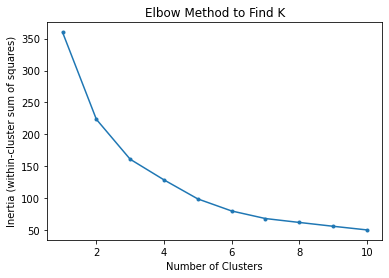

In [114]:
k_range = range(1,11)

inertia = [KMeans(i).fit(data).inertia_ for i in k_range]

plt.plot(k_range,inertia, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method to Find K')

K-means clustering, choosing k = 3

In [126]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(data)
centers = kmeans.cluster_centers_

print("Choosing k = 3, the within-cluster sum of squares is", kmeans.inertia_)
print("The 3 cluster centers are: ", centers)

clustered = kmeans.labels_


Choosing k = 3, the within-cluster sum of squares is 161.40859912320002
The 3 cluster centers are:  [[ 1.35385404 -0.83412368 -1.11084884]
 [ 0.2194138  -0.55102769  0.60381864]
 [-0.85097477  1.02149992 -0.23897931]]


Visualizing Results- 3D plot

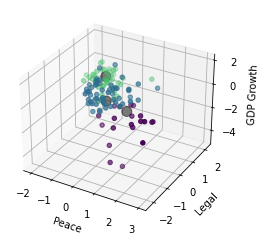

In [127]:
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d') #add first subplot in layout that has 1  row and 1 column

ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=cmap(norm(clustered)), marker='o')
#c = parameter containing sequence of colours

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
# s = size of marker
# alpha = parameter to blend values between 0 (transparent) and 1 (opaque)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()


Visualizing Results- 2D Plots

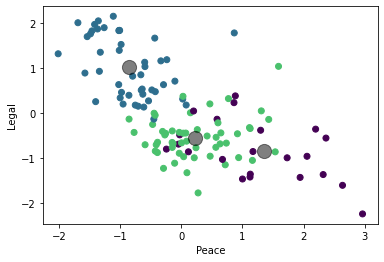

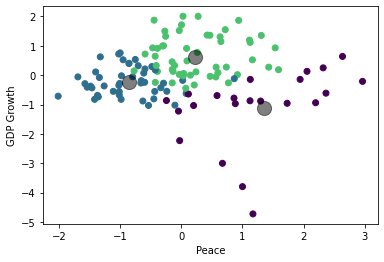

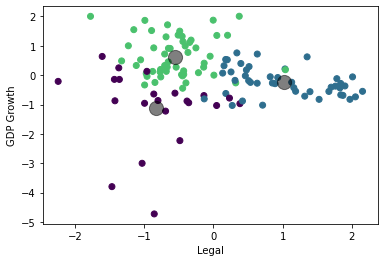

In [128]:
labels = ['Peace', 'Legal', 'GDP Growth']
figures = [(0,1), (0,2), (1,2)]

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(data.iloc[:,figures[i][0]],data.iloc[:,figures[i][1]], c = cmap(norm(y)))
    
    plt.scatter(centers[:,figures[i][0]], centers[:,figures[i][1]],c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figures[i][0]])
    plt.ylabel(labels[figures[i][1]])

 
plt.show()

In [136]:
result = pd.DataFrame({'Country':raw_data['Country'], 'Abbrev':raw_data['Abbrev'], 'Label':clustered})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3): #expand display frame
    print(result.sort_values('Label')) #sort display by label

                          Country Abbrev  Label
60                        Lebanon     LB      0
118                         Yemen     YE      0
112                       Ukraine     UA      0
110                        Turkey     TR      0
108           Trinidad and Tobago     TT      0
99                   South Africa     ZA      0
92                   Saudi Arabia     SA      0
90                         Russia     RU      0
81                       Pakistan     PK      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
69                         Mexico     MX      0
48                           Iran     IR      0
30                        Ecuador     EC      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
2                       Argentina     AR      0
16                        Burundi     BI      0
14                         Brazil     BR